In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [5]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [6]:
df.isna().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [7]:
df["Other names"] = df["Other names"].fillna("Unknown")

In [8]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Total Cases",
    hover_name="Country",
    title="COVID-19 Global Cases (Darker/Redder = Higher Cases)",
    projection="natural earth",
    color_continuous_scale="Reds"
)

fig.show()


menunjukkan jika amerika memiliki kasus terbanyak

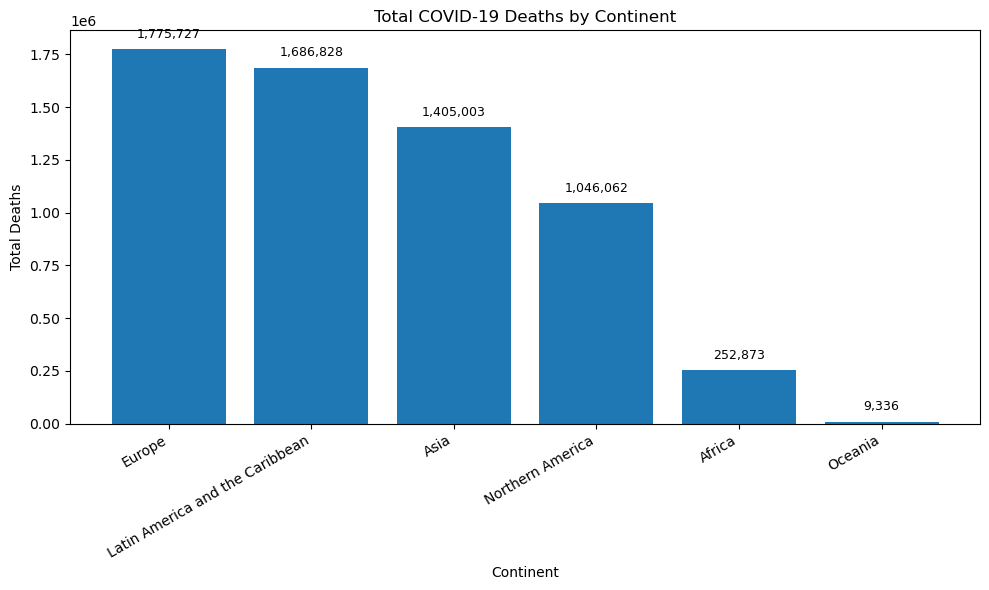

In [9]:
deaths_by_continent = (
    df.groupby("Continent", dropna=False)["Total Deaths"]
      .sum()
      .reset_index()
      .sort_values("Total Deaths", ascending=False)
      .reset_index(drop=True)
)

plt.figure(figsize=(10,6))
bars = plt.bar(deaths_by_continent["Continent"], deaths_by_continent["Total Deaths"])
plt.title("Total COVID-19 Deaths by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=30, ha="right")


for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{int(height):,}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),  
                 textcoords="offset points",
                 ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

visualisasi ini menunjukkan kematian terbanyak berada di eropa disusul oleh latin amerika dan asia

In [10]:
from sklearn.preprocessing import OrdinalEncoder
import pprint

df_encoded = df.copy()

nominal_cols = ['Country','Other names','ISO 3166-1 alpha-3 CODE','Continent']

encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols]) 

encode_dict = {}

for col, cats in zip(nominal_cols,encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)


{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5},
 'Country': {'Afghanistan': 0,
             'Albania': 1,
             'Algeria': 2,
             'Andorra': 3,
             'Angola': 4,
             'Anguilla': 5,
             'Antigua and Barbuda': 6,
             'Argentina': 7,
             'Armenia': 8,
             'Aruba': 9,
             'Australia': 10,
             'Austria': 11,
             'Azerbaijan': 12,
             'Bahamas': 13,
             'Bahrain': 14,
             'Bangladesh': 15,
             'Barbados': 16,
             'Belarus': 17,
             'Belgium': 18,
             'Belize': 19,
             'Benin': 20,
             'Bermuda': 21,
             'Bhutan': 22,
             'Bolivia': 23,
             'Bosnia and Herzegovina': 24,
             'Botswana': 25,
             'Brazil': 26,
             'B

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
79,79.0,82.0,82.0,10333930,2.0,3077711,27684,297826,2679,0.899500
14,14.0,14.0,21.0,1804995,1.0,556241,1471,308168,815,0.264454
159,159.0,156.0,161.0,112133868,1.0,3679485,59343,32813,529,1.612807
185,185.0,184.0,178.0,716351,5.0,11470,133,16012,186,1.159547
84,84.0,88.0,77.0,13755881,0.0,36459,440,2650,32,1.206835


# K-means

In [11]:
from sklearn.preprocessing import StandardScaler
features = df_encoded.copy()
feature2 = df_encoded.copy() # buat hirerical

X_unscaled = features.values
scaler = StandardScaler()

X_scaled = scaler.fit_transform(features)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

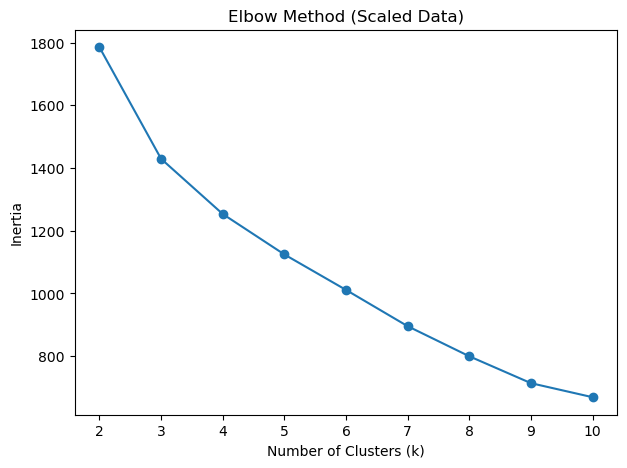

In [12]:
from sklearn.cluster import KMeans
inertia_list = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia_list, marker='o')
plt.title("Elbow Method (Scaled Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()



In [13]:
k = 3
kmeans_unscaled = KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans_scaled = KMeans(n_clusters=k,random_state=42,n_init=10)

clusters_unscaled = kmeans_unscaled.fit_predict(X_unscaled)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

df['Cluster_Unscaled'] = clusters_unscaled
df['Cluster_Scaled']   = clusters_scaled

df_encoded['Cluster_Unscaled'] = clusters_unscaled
df_encoded['Cluster_Scaled']   = clusters_scaled


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [14]:
cluster_summary = df_encoded.groupby('Cluster_Unscaled').agg(['mean', 'median', 'min', 'max'])
cluster_summary

Country                     Other names               \
                        mean median   min    max        mean median   min   
Cluster_Unscaled                                                            
0                 112.019048  112.5   0.0  224.0  111.971429  112.5   0.0   
1                  67.000000   67.0  42.0   92.0   68.500000   68.5  41.0   
2                 118.615385  130.0  15.0  219.0  119.153846  131.0  15.0   

                        ISO 3166-1 alpha-3 CODE         ... Tot Deaths/1M pop  \
                    max                    mean median  ...               min   
Cluster_Unscaled                                        ...                     
0                 224.0              111.928571  112.5  ...                 0   
1                  96.0               66.000000   66.0  ...                 3   
2                 218.0              120.230769  131.0  ...                15   

                       Death percentage                                 \
                   max             mean    median       min        max   
Cluster_Unscaled                                                         
0                 6286         1.396774  0.975096  0.000000  18.151787   
1                  371         2.104518  2.104518  1.211712   2.997325   
2                 3068         2.107418  1.612807  0.424537   5.705041   

                 Cluster_Scaled                 
                           mean median min max  
Cluster_Unscaled                                
0                      0.504762    1.0   0   1  
1                      1.000000    1.0   0   2  
2                      0.769231    1.0   0   2  

[3 rows x 44 columns]

In [15]:
from sklearn.metrics import silhouette_score
inertia_unscaled = kmeans_unscaled.inertia_
inertia_scaled = kmeans_scaled.inertia_

sil_unscaled = silhouette_score(X_unscaled, clusters_unscaled)
sil_scaled = silhouette_score(X_scaled,clusters_scaled)

print("Inertia (Unscaled) :", inertia_unscaled)
print("Inertia (Scaled)   :", inertia_scaled)
print("Silhouette (Unscaled):", sil_unscaled)
print("Silhouette (Scaled):", sil_scaled)

Inertia (Unscaled) : 1.5165028408665494e+17
Inertia (Scaled)   : 1429.4781456020328
Silhouette (Unscaled): 0.84817738881809
Silhouette (Scaled): 0.24930144251538214


# Hierarchical Agglomerative Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
feature2['Agg_Cluster'] = agg.fit_predict(X_scaled)

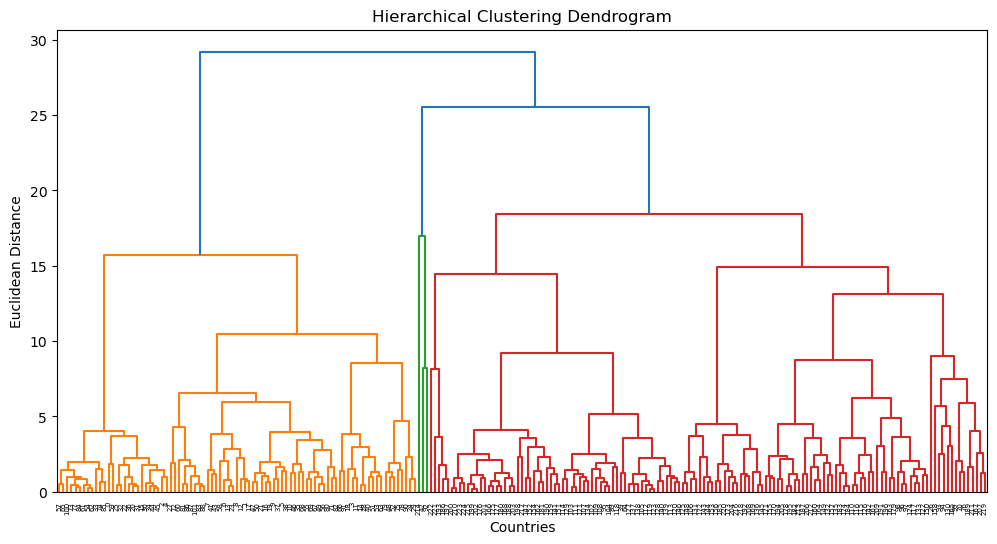

In [17]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
sil_score_agg = silhouette_score(X_scaled, feature2['Agg_Cluster'])
sil_score_agg


0.23333485993660966

In [19]:
feature2.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Agg_Cluster
0,0.0,0.0,1.0,40462186,1.0,177827,7671,4395,190,4.313743,1
1,1.0,1.0,4.0,2872296,2.0,273870,3492,95349,1216,1.275058,1
2,2.0,2.0,57.0,45236699,0.0,265691,6874,5873,152,2.587216,1
3,3.0,3.0,5.0,77481,2.0,40024,153,516565,1975,0.382271,1
4,4.0,4.0,2.0,34654212,0.0,99194,1900,2862,55,1.915438,1


In [20]:
feature2['Agg_Cluster'].value_counts()

Agg_Cluster
0    135
1     87
2      3
Name: count, dtype: int64

In [21]:
cluster_summary = df_encoded.groupby('Cluster_Unscaled').agg(['mean', 'median', 'min', 'max'])
cluster_summary

Country                     Other names               \
                        mean median   min    max        mean median   min   
Cluster_Unscaled                                                            
0                 112.019048  112.5   0.0  224.0  111.971429  112.5   0.0   
1                  67.000000   67.0  42.0   92.0   68.500000   68.5  41.0   
2                 118.615385  130.0  15.0  219.0  119.153846  131.0  15.0   

                        ISO 3166-1 alpha-3 CODE         ... Tot Deaths/1M pop  \
                    max                    mean median  ...               min   
Cluster_Unscaled                                        ...                     
0                 224.0              111.928571  112.5  ...                 0   
1                  96.0               66.000000   66.0  ...                 3   
2                 218.0              120.230769  131.0  ...                15   

                       Death percentage                                 \
                   max             mean    median       min        max   
Cluster_Unscaled                                                         
0                 6286         1.396774  0.975096  0.000000  18.151787   
1                  371         2.104518  2.104518  1.211712   2.997325   
2                 3068         2.107418  1.612807  0.424537   5.705041   

                 Cluster_Scaled                 
                           mean median min max  
Cluster_Unscaled                                
0                      0.504762    1.0   0   1  
1                      1.000000    1.0   0   2  
2                      0.769231    1.0   0   2  

[3 rows x 44 columns]

In [22]:

fig = px.choropleth(feature2,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Agg_Cluster",
                    hover_name="Country")
fig.show()

perbandingan silluete score bisa dilihat seperti ini untuk K-means : 
- Silhouette (Unscaled): 0.84817738881809
- Silhouette (Scaled): 0.24930144251538214

dan untuk Hierarchical Agglomerative Clustering 
 - 0.2333348599366096 

k-means memiliki hasil yang lebih besar terutama bagian unscalednya 





penjelassan cluster sebagai berikut 
K-means :
Cluster 0 – Dampak Rendah
Nilai rata-rata kasus/kematian per 1 juta berada di tingkat menengah-rendah.
Death percentage paling rendah (~1.39%).
➡ Negara dengan dampak COVID-19 relatif terkendali.

Cluster 1 – Dampak Sedang
Kasus dan kematian berada pada tingkat menengah.
CFR lebih tinggi dari Cluster 0 (~2.10%).
➡ Negara dengan beban pandemi moderat.

Cluster 2 – Dampak Tinggi
Banyak nilai maksimum pada kasus & kematian per 1 juta (hingga 3068).
Death percentage tertinggi (maks ~5.70%).
➡ Negara dengan dampak pandemi paling berat.

aggro : 
Cluster 0 – Low Impact (Aman)
Negara-negara dengan kasus dan kematian rendah serta CFR rendah (~1.39%). Dampak pandemi relatif terkendali.

Cluster 1 – Medium Impact (Sedang)
Memiliki tingkat kasus dan kematian menengah, dengan CFR sekitar 2%. Beban pandemi moderat.

Cluster 2 – High Impact (Bahaya)
Kelompok kecil negara dengan kasus dan kematian sangat tinggi, serta CFR tertinggi (hingga 5.7%). Dampak pandemi paling berat.